# Question 1

In [2]:
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
# np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) )
x_=[]
y_=[]
for i in X:
    x_.append(i[0])
    y_.append(i[1])
    

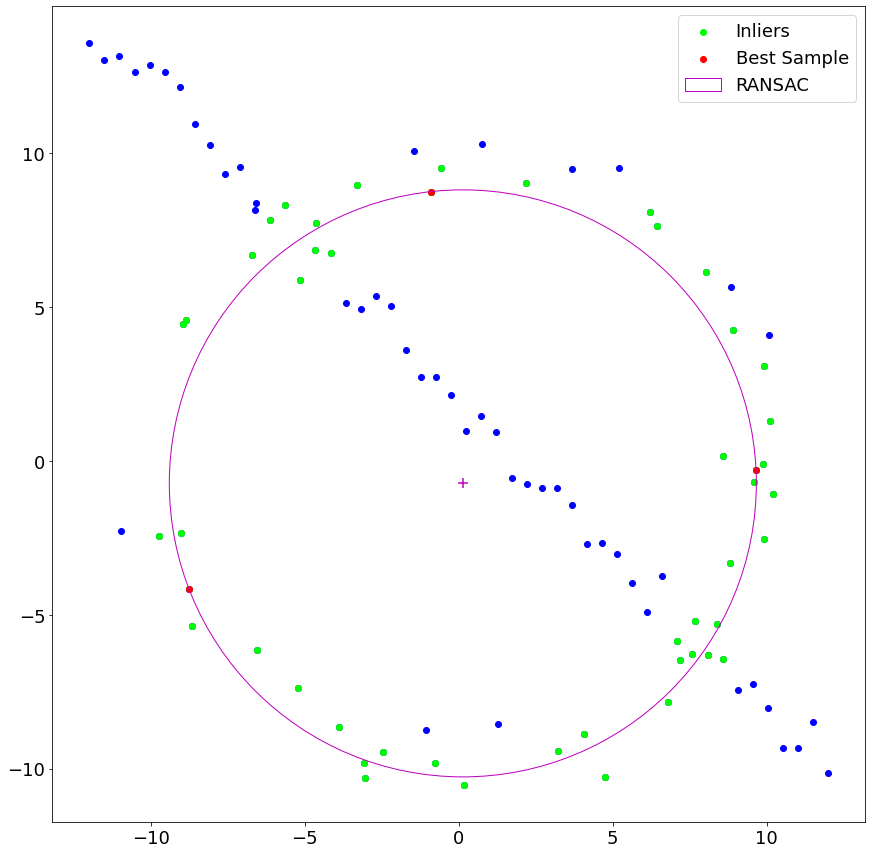

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv



def circle_func(a, b, r, x):
    return (np.sqrt(r**2-(x-a)**2) + b, -np.sqrt(r**2-(x-a)**2) + b)

class RANSAC:
    def __init__(self, x_data, y_data, n):
        self.x_data = x_data
        self.y_data = y_data
        self.n = n
        self.d_max=0
        self.best_model = None
        self.point= None
        self.mod = None
    def random_sampling(self):
        sample = []
        save_ran = []
        count = 0

        # get three points from data
        while True:
            ran = np.random.randint(len(self.x_data))
            if ran not in save_ran:
                sample.append((self.x_data[ran], self.y_data[ran]))
                save_ran.append(ran)
                count += 1

                if count == 3:
                    break

        return sample
    
    def make_model(self, sample):
        # calculate A, B, C value from three points by using matrix

        pt1 = sample[0]
        pt2 = sample[1]
        pt3 = sample[2]
       
        A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
        B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
        inv_A = inv(A)

        c_x, c_y = np.dot(inv_A, B) / 2
       
        c_x, c_y = c_x[0], c_y[0]
        r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)
        

        return c_x, c_y, r
        
    def eval_model(self, model):
        
        c_x, c_y, r = model
        t= 2
        vote = 0
        point = []
      
        for i in range(len(self.x_data)):
            dis = np.sqrt((self.x_data[i]-c_x)**2 + (self.y_data[i]-c_y)**2)
            
    
            if abs(dis-r)<=t:
                vote+=1
                
                point.append([self.x_data[i],self.y_data[i]])
                
             
        self.point = point
        return vote

    def execute_ransac(self):
        # find best model
        
        for i in range(self.n):
            mod=self.random_sampling()
            model = self.make_model(mod)
            c_x, c_y, r = model
            d_temp = self.eval_model(model)
                
            if self.d_max < d_temp:
                self.best_model = model
                self.d_max = d_temp
                self.mode = mod
                
                
def get_inliers(xd,yd,cx,cy,r):
    P=[]
    t=1.2
    
    for i in range(len(xd)):
        dis = np.sqrt((xd[i]-cx)**2 + (yd[i]-cy)**2)
        if abs(dis-r)<=t:
            P.append([xd[i],yd[i]])
        
    return (P)
    

if __name__ == '__main__':
    # make data
    x_data, y_data = x_,y_
    
    plt.scatter(x_data, y_data, c='blue')

    ransac = RANSAC(x_data, y_data, 100)
    
    ransac.execute_ransac()
    
    # get best model from ransac
    a, b, r = ransac.best_model[0], ransac.best_model[1], ransac.best_model[2]
    Point = get_inliers(x_,y_,a,b,r)
    
    x_1=[]
    y_1=[]
    for i in Point:
        x_1.append(i[0])
        y_1.append(i[1])
    
    x_2=[]
    y_2=[]
    for i in ransac.mode:
        x_2.append(i[0])
        y_2.append(i[1])
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.rcParams.update({'font.size': 18})
    plt.scatter(x_1,y_1,color = 'lime',label='Inliers')
    plt.scatter(x_2,y_2,color = 'red',label='Best Sample')
    plt.scatter(a,b,s = 100,c = 'm',marker = '+')
    circle = plt.Circle((a, b), radius=r, color='m', fc='y', fill=False,label = 'RANSAC')
    
    plt.gca().add_patch(circle)
    plt.axis('scaled')
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1,2,0]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]) 
    plt.show()

# Question 2

# Question 3

## Part (A)

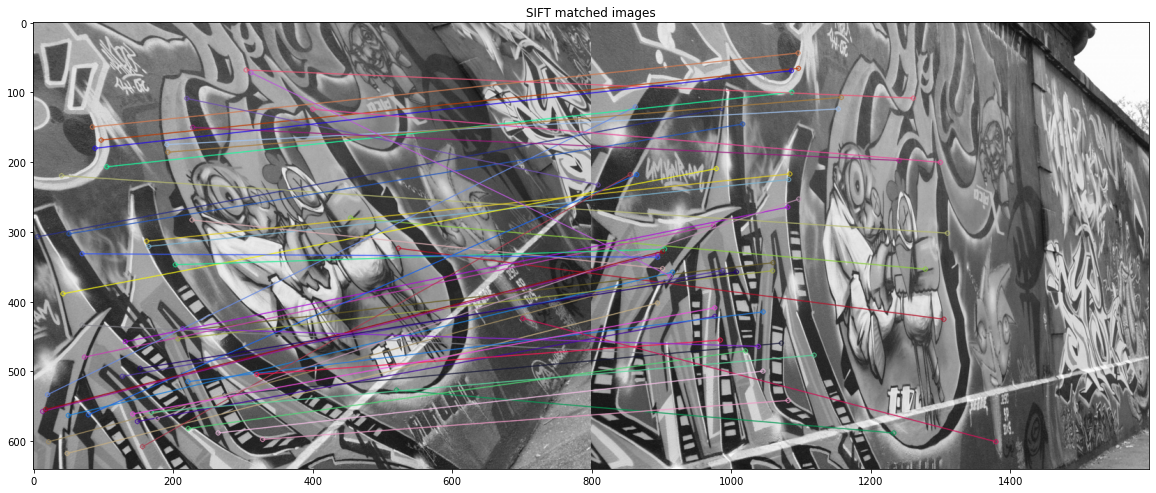

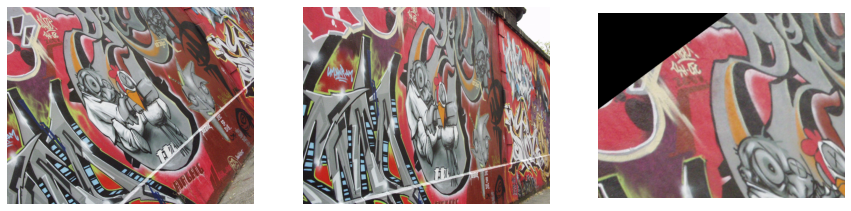

In [60]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
image1 = cv2.imread('img4.ppm')          # queryImage
image2 = cv2.imread('img5.ppm') # trainImage

img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches_ = bf.match(des1,des2)
matches_ = sorted(matches_, key = lambda x:x.distance)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)


# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
src=[]
dst=[]

# ratio test as per Lowe's paper
for i, (m1,m2) in enumerate(matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]
        ## Notice: How to get the index
        pt1 = kp1[m1.queryIdx].pt
        pt2 = kp2[m1.trainIdx].pt
        src.append([pt1[0],pt1[1]])
        dst.append([pt2[0],pt2[1]])
(H, status) = cv2.findHomography(np.array(src), np.array(dst), cv2.RANSAC,4)      
result = cv2.warpPerspective(image2, np.linalg.inv(H),(400,300))
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches_[:50], img2, flags=2)
fig,ax = plt.subplots(1,1,figsize=(20,20))
ax.set_title("SIFT matched images")
ax.imshow(img3)
fig, ax = plt.subplots(1,3, figsize = (15,20)) 
ax[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)) 
ax[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)) 
ax[2].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
for i in range(3):     
    ax[i].axis("off") 
plt.show()









True